In [41]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv("merged-normalized.csv")
df = df.drop(["Date"],axis=1)
df["Time"]=pd.to_datetime(df["Time"], format='%H:%M:%S').dt.hour
#df["Time"] = stats.zscore(df["Time"])
df.head()
df.rename(columns = {'icon':'weather'}, inplace = True)

In [43]:
#Label encode
label_encoder = preprocessing.LabelEncoder()
for col in df:
    if df[col].dtype == "object":
        df[col]=label_encoder.fit_transform(df[col])
df.head()

,Time,Race,Gender,Body_Size,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,...,buyDrinks,TotalSpent_RM,latitude,longitude,Num_of_Baskets,tempmax,tempmin,humidity,description,weather
0,20,3,1,1,1,3,0,8,0,1,...,-0.306655,-1.175289,-1.974354,0.219731,-1.24844,-0.804993,0.954235,0.51219,3,0
1,20,2,1,2,0,1,0,9,0,9,...,0.873818,1.620044,-1.844641,0.072282,1.25697,-0.804993,0.954235,0.51219,3,0
2,20,3,0,1,0,1,0,1,0,8,...,-0.306655,-0.243511,-1.678802,1.008022,-1.24844,-0.804993,0.954235,0.51219,3,0
3,21,2,1,2,0,1,1,0,0,0,...,-0.306655,0.455322,-1.495611,0.011978,-1.24844,-0.804993,0.954235,0.51219,3,0
4,21,2,1,0,0,1,0,1,0,1,...,-0.896892,-0.243511,-2.086209,0.252582,1.25697,-0.804993,0.954235,0.51219,3,0


In [44]:
df_scale=StandardScaler().fit_transform(df)
df_scale

array([[ 1.18681789,  1.27571711,  1.01106117, ...,  0.32048271,
        -1.61651613, -4.85597273],
       [ 1.18681789,  0.39667001,  1.01106117, ...,  0.32048271,
        -1.61651613, -4.85597273],
       [ 1.18681789,  1.27571711, -0.98905984, ...,  0.32048271,
        -1.61651613, -4.85597273],
       ...,
       [ 1.61727927,  0.39667001,  1.01106117, ...,  0.55110388,
        -0.09848244,  0.51221454],
       [-0.67851475, -1.36142421,  1.01106117, ...,  0.55110388,
        -0.09848244,  0.51221454],
       [-1.39595038,  0.39667001, -0.98905984, ...,  0.55110388,
        -0.09848244,  0.51221454]])

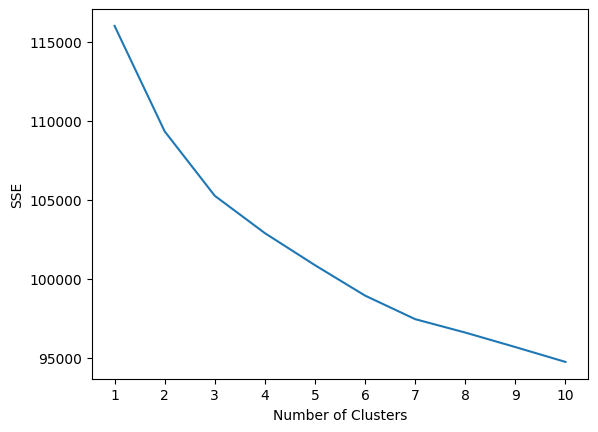

In [45]:
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_scale)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [46]:
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=3, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(df_scale)

#view cluster assignments for each observation
kmeans.labels_

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

In [47]:
#append cluster assingments to original DataFrame
df['cluster'] = kmeans.labels_

#view updated DataFrame
df

,Time,Race,Gender,Body_Size,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,...,TotalSpent_RM,latitude,longitude,Num_of_Baskets,tempmax,tempmin,humidity,description,weather,cluster
0,20,3,1,1,1,3,0,8,0,1,...,-1.175289,-1.974354,0.219731,-1.248440,-0.804993,0.954235,0.512190,3,0,2
1,20,2,1,2,0,1,0,9,0,9,...,1.620044,-1.844641,0.072282,1.256970,-0.804993,0.954235,0.512190,3,0,2
2,20,3,0,1,0,1,0,1,0,8,...,-0.243511,-1.678802,1.008022,-1.248440,-0.804993,0.954235,0.512190,3,0,2
3,21,2,1,2,0,1,1,0,0,0,...,0.455322,-1.495611,0.011978,-1.248440,-0.804993,0.954235,0.512190,3,0,2
4,21,2,1,0,0,1,0,1,0,1,...,-0.243511,-2.086209,0.252582,1.256970,-0.804993,0.954235,0.512190,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,22,0,1,2,0,1,1,5,1,0,...,1.620044,0.507268,0.156118,0.004265,-1.437056,-0.148208,0.771968,7,3,0
3996,11,2,1,1,1,0,1,2,2,6,...,-0.942345,0.516629,0.368160,0.004265,-1.437056,-0.148208,0.771968,7,3,0
3997,23,2,1,1,1,3,0,0,0,0,...,0.455322,0.544276,0.217933,-1.248440,-1.437056,-0.148208,0.771968,7,3,0
3998,7,0,1,1,1,2,1,5,2,8,...,0.222378,0.912267,0.384060,1.256970,-1.437056,-0.148208,0.771968,7,3,0


In [39]:
kmeans.labels_

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)